# Basic Epidemiology Models

In [1]:
using AlgebraicPetri.Epidemiology

using Petri
using StochasticDiffEq
using Plots

using Catlab.Theories
using Catlab.CategoricalAlgebra.ShapeDiagrams
using Catlab.Graphics

display_wd(ex) = to_graphviz(ex, orientation=LeftToRight, labels=true);

#### SIR Model:

define model

In [2]:
sir = transmission ⋅ recovery

compose(transmission,recovery)

get resulting petri net and visualize model

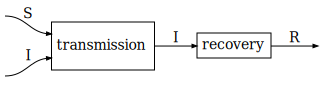

In [3]:
p_sir = decoration(F_epi(sir));
display_wd(sir)

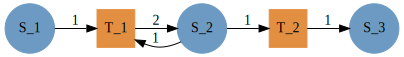

In [4]:
Graph(p_sir)

define initial states and transition rates, then
create, solve, and visualize ODE problem

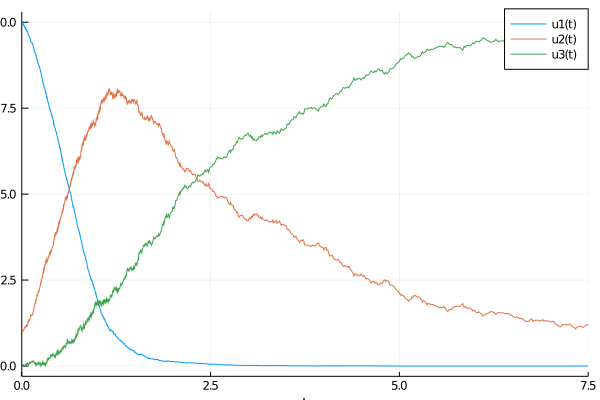

In [5]:
u0 = [10.0, 1, 0];
p = [0.4, 0.4];

prob,cb = SDEProblem(p_sir,u0,(0.0,7.5),p);
sol = solve(prob,SRA1(),callback=cb)

plot(sol)

#### SEIR Model:

define model

In [6]:
sei = exposure ⋅ (illness ⊗ id(I)) ⋅ ∇(I)

seir = sei ⋅ recovery

compose(exposure,otimes(illness,id(I)),mmerge(I),recovery)

get resulting petri net and visualize model

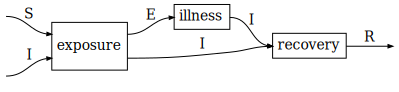

In [7]:
p_seir = decoration(F_epi(seir));

display_wd(seir)

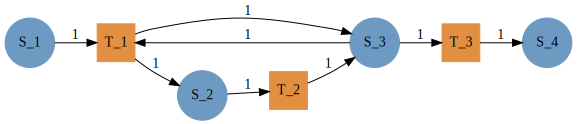

In [8]:
Graph(p_seir)

define initial states and transition rates, then
create, solve, and visualize ODE problem

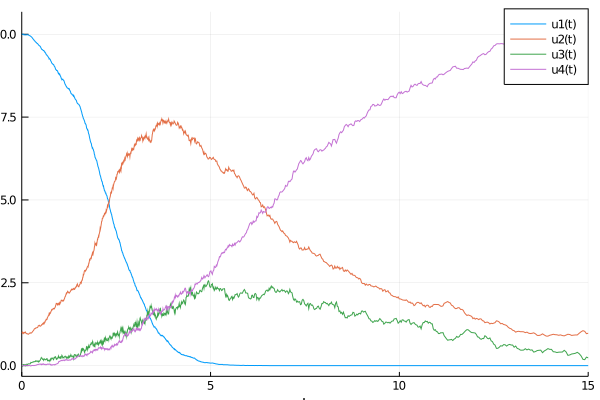

In [9]:
u0 = [10.0, 1, 0, 0];
p = [0.9, 0.2, 0.5];

prob,cb = SDEProblem(p_seir,u0,(0.0,15.0),p);
sol = solve(prob,SRA1(),callback=cb)

plot(sol)

#### SEIRD Model:

define model

In [10]:
seird = sei ⋅ Δ(I) ⋅ (death ⊗ recovery)

compose(exposure,otimes(illness,id(I)),mmerge(I),mcopy(I),otimes(death,recovery))

get resulting petri net and visualize model

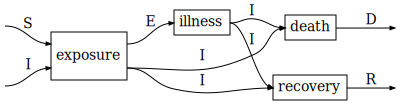

In [11]:
p_seird = decoration(F_epi(seird));

display_wd(seird)

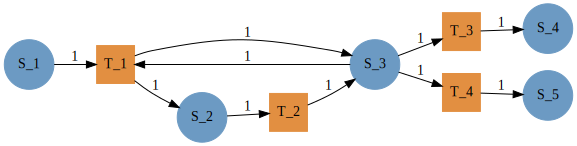

In [12]:
Graph(p_seird)

define initial states and transition rates, then
create, solve, and visualize ODE problem

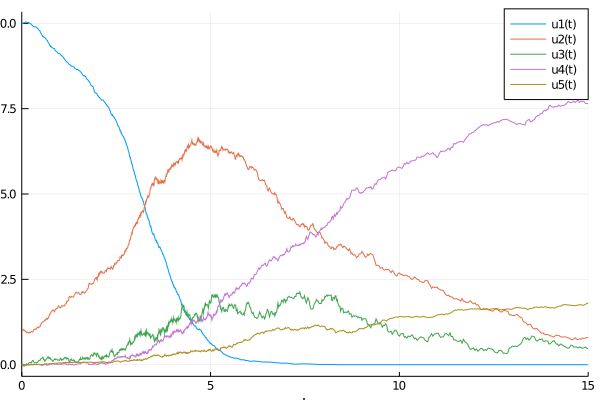

In [13]:
u0 = [10.0, 1, 0, 0, 0];
p = [0.9, 0.2, 0.5, 0.1];

prob,cb = SDEProblem(p_seird,u0,(0.0,15.0),p);
sol = solve(prob,SRA1(),callback=cb)

plot(sol)